In [1]:
import numpy as np 
import pandas as pd 
from classLib_yash_Copy1 import *
import random

import matplotlib.pyplot as plt

In [2]:
# data_list=[]
# for i in range(10):
randompoints= [] # generating random point between 0 and 1
for i in range(1000): 
    a=[900*np.round(random.random(),4), 900-900*np.round(random.random(),4)]
    randompoints.append(a)
allWaypoint = [] #here selecting the points which have a distance of more than 'a' 
for j in range(len(randompoints)):
    a=[]
    for k in range(j+1,len(randompoints)):
        s=np.linalg.norm(np.array(randompoints[j])-np.array(randompoints[k])) 
        a.append(s)
    if all(i>0.16 for i in a):
        allWaypoint.append(randompoints[j])
# print('no of waypoints:', len(allWaypoint))
wpList = allWaypoint[:15] #need 15 waypoints

wpList=np.round(wpList,4)
# print(wpList, len(wpList))
wpN = ['wpA','wpB','wpC','wpD','wpE','wpF','wpG','wpH','wpI', 'wpJ','wpK','wpL','wpM', 'wpN','wpO','wpP']
wpNameList=wpN[:len(wpList)]
waypointList =[]
for i in range(len(wpList)):
    waypointList.append(WayPoint(wpNameList[i],wpList[i])) #list containing waypoint class elements

wpList

array([[703.08, 888.3 ],
       [718.29, 301.14],
       [175.23, 333.72],
       [390.42, 280.35],
       [896.49,  86.58],
       [ 68.22,  73.53],
       [281.52, 810.18],
       [879.66, 685.71],
       [655.2 , 615.42],
       [684.81, 132.57],
       [816.93, 182.43],
       [148.32, 310.5 ],
       [ 37.26, 787.14],
       [639.  , 789.66],
       [709.38,  43.65]])

In [5]:
airwayList=[]
# sampled_airways=[]
for i in range(10): #no of airways chosen 8 at random
    points = random.sample(waypointList,2)
    airwayList.append(Airways( points[0].name +'_'+ points[1].name, points[0], points[1]))

In [ ]:
ac_per_scenario = 8  # just a random number to have no of aircraft in one scenario
aircraftList=[]
aircraft_name=[]
for n in range(1,ac_per_scenario+1):
    aircraft_name.append('ac'+str(n))
for i in range(ac_per_scenario):
    point = np.random.choice(airwayList)
    d=[50,100,150,200,250] #offset
    aircraft= Aircraft(str(aircraft_name[i]),point,np.random.choice(d))
    aircraftList.append(aircraft)


In [ ]:
aircraftList[7].offset_y


In [ ]:
d= Scenario(waypointList,airwayList)



dict1={}
for i in range(len(waypointList)):
    waydict={waypointList[i].name:{
        'x':waypointList[i].x,
        'y':waypointList[i].y}}
    dict1.update(waydict)

dict2={}
for i in range(len(airwayList)):
    airwaydict= {airwayList[i].name:{
        'start':airwayList[i].start_wp,
        'end' : airwayList[i].end_wp}}
    dict2.update(airwaydict)

dict3={}
for i in range(len(aircraftList)):
    aircraftdict= {aircraftList[i].name:{
        'x':aircraftList[i].start_wp_x,
        'y':aircraftList[i].start_wp_y,
        'dir_x': aircraftList[i].dir_x,
        'dir_y': aircraftList[i].dir_y}}
    dict3.update(aircraftdict)


data_dict={'waypoints':dict1, 'airways':dict2, 'aircrafts':dict3}
data_list.append(data_dict)



In [ ]:
import json
with open('scenario_test_x1.json', 'w') as json_file:
    json.dump(data_list, json_file)


    
        

In [ ]:
print(airwayList[0])

In [ ]:
airwayList[0].end_wp

In [ ]:
d= Scenario(waypointList,airwayList)

In [ ]:
d.waypointinfo()

In [ ]:
d.airwayinfo()

In [ ]:
d.plot()

In [ ]:
dict1={}
for i in range(len(waypointList)):
    waydict={waypointList[i].name:{
        'x':waypointList[i].x,
        'y':waypointList[i].y}}
    dict1.update(waydict)
dict1

In [ ]:
900*0.02

In [ ]:
dic_list=[]
dic_list.append(dict1)
dic_list.append(dict2)
dic_list.append(dict3)


In [ ]:
dic_list

# Testing snippets for code for chosing waypoints in a region

In [1]:
import pandas as pd
import os
from pathlib import Path
Path.cwd()
import numpy as np
from shapely.geometry import Polygon, Point
from shapely.ops import transform
from functools import partial
import pyproj

In [2]:
os.chdir('E:\\atmri\\CD_R')

In [3]:
Path.cwd()

WindowsPath('E:/atmri/CD_R')

In [4]:

df = pd.read_json('.\ATCO_preferences_interface\Scenario_interface_work\waypoints.json')


In [5]:
def filter_transformCoords(x1,y1,x2,y2,x3,y3,x4,y4, wpdataFrame):
    inboundWps = pd.DataFrame()
    horizontal_len = x2-x1
    vertical_len = y3-y1
    boundary_coordinates = ([x1,y1],[x2,y2],[x3,y3],[x4,y4])
    poly = Polygon(boundary_coordinates)
    for i in range(len(wpdataFrame)):
        point = Point([wpdataFrame.loc[i,'lat'],wpdataFrame.loc[i,'lon']])
        if poly.contains(point)== True:
            inboundWps=inboundWps.append(wpdataFrame.loc[i])
    return inboundWps

In [6]:
A=filter_transformCoords(1.19,103.06,1.76,103.06,1.76,104.7,1.19,104.7,df)
A=A.reset_index(drop=True)
A.head(10)

,lat,latdms,lon,londms,name
0,1.664,013950.4N,103.661,1033939.2E,JOHOR BAHRU DVOR/DME (VJB)
1,1.615,013654N,103.120,1030712E,ARAMA (50 DME SJ)(Delegated airspace BDRY)
2,1.498,012954N,103.340,1032024E,35DME
3,1.458,012729N,103.414,1032450E,LELIB
4,1.344,012037N,103.629,1033746E,MASNI (FIR BDRY)
5,1.222,011319N,103.856,1035120E,SINJON DVOR/DME (SJ)
6,1.552,013306N,103.089,1030521E,REKOP (50 DME SJ)(delegated airspace BDRY)
7,1.447,012648N,103.336,1032008E,PIMOK
8,1.324,011928N,103.619,1033710E,BONSU (FIR BDRY)
9,1.758,014530N,103.970,1035812E,20DME (20 DME PU)


In [7]:

d = (A.loc[2,'lat'],A.loc[2,'lon'])
d = np.array(d)
d

array([  1.498, 103.34 ])

In [8]:
from numpy import linalg
horizontal_len=1.64
vertical_len = 0.57
a= np.array([1.19,103.06])
a_ = np.array([a[1],a[0]])
b=  np.array([1.19,104.7])
b_ = np.array([b[1],b[0]])
c =np.array([1.76,104.7])
c_ = np.array([c[1],c[0]])
d=  np.array([1.76,103.06])
d_ = np.array([d[1],d[0]])
transform_x = []
transform_y =[]
for i in range(len(A)):
        P = np.array([A.loc[i,'lon'], A.loc[i,'lat']])
        vert_d = np.linalg.norm(np.cross(b_-a_,P-a_))/np.linalg.norm(b_-a_)
        horiz_d = np.linalg.norm(np.cross(d_-a_,P-a_))/np.linalg.norm(d_-a_)
        new_horz = (900/horizontal_len)*horiz_d
        new_vert = (900/vertical_len)*vert_d
        transform_x.append(new_horz)
        transform_y.append(new_vert)
        print(new_vert,new_horz)

748.421052631579 329.81707317073125
671.0526315789475 32.926829268293936
486.31578947368433 153.6585365853665
423.15789473684214 194.26829268292641
243.15789473684228 312.2560975609771
50.526315789473735 436.82926829267876
571.5789473684212 15.91463414633947
405.78947368421075 151.4634146341443
211.57894736842124 306.7682926829255
896.842105263158 499.3902439024373
355.263157894737 527.9268292682946
893.684210526316 467.5609756097583
631.5789473684213 473.59756097560955
367.89473684210543 479.0853658536612
489.4736842105264 357.8048780487811
393.1578947368423 374.8170731707278
249.4736842105265 400.6097560975632
221.05263157894757 738.1097560975604
524.2105263157896 510.36585365853256
503.6842105263157 421.4634146341468
671.0526315789475 32.926829268293936
120.00000000000011 159.6951219512178


In [9]:
transF_x=pd.Series(transform_x,name='transf_x')
transF_y=pd.Series(transform_y,name='transf_y')
A = pd.concat([A,transF_x,transF_y],axis=1)
A

,lat,latdms,lon,londms,name,transf_x,transf_y
0,1.664,013950.4N,103.661,1033939.2E,JOHOR BAHRU DVOR/DME (VJB),329.817073,748.421053
1,1.615,013654N,103.120,1030712E,ARAMA (50 DME SJ)(Delegated airspace BDRY),32.926829,671.052632
2,1.498,012954N,103.340,1032024E,35DME,153.658537,486.315789
3,1.458,012729N,103.414,1032450E,LELIB,194.268293,423.157895
4,1.344,012037N,103.629,1033746E,MASNI (FIR BDRY),312.256098,243.157895
5,1.222,011319N,103.856,1035120E,SINJON DVOR/DME (SJ),436.829268,50.526316
6,1.552,013306N,103.089,1030521E,REKOP (50 DME SJ)(delegated airspace BDRY),15.914634,571.578947
7,1.447,012648N,103.336,1032008E,PIMOK,151.463415,405.789474
8,1.324,011928N,103.619,1033710E,BONSU (FIR BDRY),306.768293,211.578947
9,1.758,014530N,103.970,1035812E,20DME (20 DME PU),499.390244,896.842105


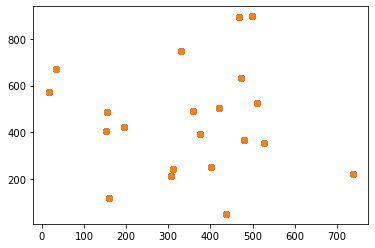

In [20]:
import matplotlib.pyplot as plt
for i in range(len(A)):
    plt.scatter(transF_x,transF_y)
plt.savefig('E:\ATMRI\CD_R\ATCO_preferences_interface\Scenario_interface_work\python-code\Figures\waypoints.jpg',dpi=600)

## plotting lat lons in basemap

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


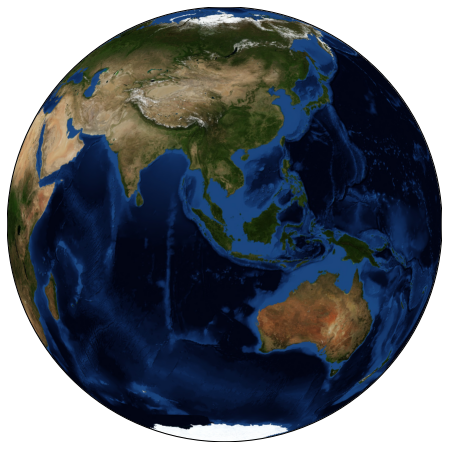

In [12]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=1.19, lon_0=104)
m.bluemarble(scale=0.5)

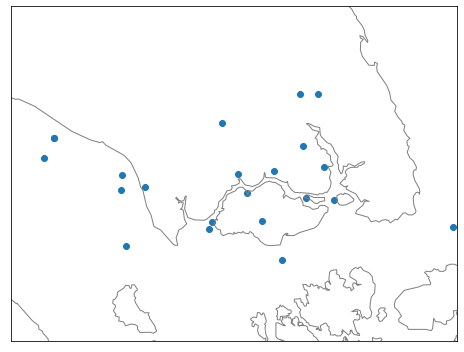

In [18]:
lat = A['lat'].values
lon = A['lon'].values
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc',   resolution='h',
            lat_0=1.5, lon_0=103.7,width=1.6E5, height=1.2E5)
# m.shadedrelief()
m.drawcoastlines(color='gray')
# m.drawcountries(color='black')
m.drawstates(color='gray')
m.scatter(lon,lat, latlon=True)

sector6_Polygon

m.plot(x,y for x,y in sector6_Polygon.exterior.xy)

plt.savefig('E:\ATMRI\CD_R\ATCO_preferences_interface\Scenario_interface_work\python-code\Figures\sg_withwaypoints.jpg',dpi=600)

### compiled transformation code

In [6]:
def filter_transformCoords(x1,y1,x2,y2,x3,y3,x4,y4, wpdataFrame):
      
    inboundWps = pd.DataFrame()
    boundary_coordinates = ([x1,y1],[x2,y2],[x3,y3],[x4,y4])
    poly = Polygon(boundary_coordinates)
    for i in range(len(wpdataFrame)):
        point = Point([wpdataFrame.loc[i,'lat'],wpdataFrame.loc[i,'lon']])
        if poly.contains(point)== True:
            inboundWps=inboundWps.append(wpdataFrame.loc[i])

    inboundWps=inboundWps.reset_index()
    a_ = np.array([y1,x1])
    # print(a_)
    b_ = np.array([y2,x2])
    c_ = np.array([y3,x3])
    d_ = np.array([y4,x4])

    horizontal_len= b_[0]-a_[0]
    # print(horizontal_len)
    vertical_len = d_[1]-a_[1]
    # print(vertical_len)

    transform_x = []
    transform_y =[]

    for i in range(len(inboundWps)):
    
        P = np.array([inboundWps.loc[i,'lon'], inboundWps.loc[i,'lat']])
        # print('P = '/, P)
        vert_d = np.linalg.norm(np.cross(b_-a_,a_-P))/np.linalg.norm(b_-a_)
        # print("vertical_distance",vert_d)
        horiz_d = np.linalg.norm(np.cross(d_-a_,a_-P))/np.linalg.norm(d_-a_)
        # print("^&^")
        new_horz = (900/horizontal_len)*horiz_d
        # print(new_horz)
        # print(")()()")
        new_vert = (900/vertical_len)*vert_d
        # print("******new vert",new_vert)
        transform_x.append(new_horz)
        # print("transform_x = ",transform_x)
        transform_y.append(new_vert)
        # print("^")
    # print(transform_x)
    # print("****")
    transF_x=pd.Series(transform_x,name= 'transf_x')
    transF_y=pd.Series(transform_y,name= 'transf_y')
    print("done")
    new_df = pd.concat([inboundWps,transF_x,transF_y], axis=1)
    
    return new_df
   
   

asd = filter_transformCoords(1.19,103.06,1.19,104.7,1.76,104.7,1.76,103.06,df)
# asd = asd.reset_index()
asd

done


,index,lat,latdms,lon,londms,name,transf_x,transf_y
0,0,1.664,013950.4N,103.661,1033939.2E,JOHOR BAHRU DVOR/DME (VJB),329.817073,748.421053
1,4,1.615,013654N,103.120,1030712E,ARAMA (50 DME SJ)(Delegated airspace BDRY),32.926829,671.052632
2,5,1.498,012954N,103.340,1032024E,35DME,153.658537,486.315789
3,6,1.458,012729N,103.414,1032450E,LELIB,194.268293,423.157895
4,7,1.344,012037N,103.629,1033746E,MASNI (FIR BDRY),312.256098,243.157895
5,8,1.222,011319N,103.856,1035120E,SINJON DVOR/DME (SJ),436.829268,50.526316
6,10,1.552,013306N,103.089,1030521E,REKOP (50 DME SJ)(delegated airspace BDRY),15.914634,571.578947
7,11,1.447,012648N,103.336,1032008E,PIMOK,151.463415,405.789474
8,12,1.324,011928N,103.619,1033710E,BONSU (FIR BDRY),306.768293,211.578947
9,14,1.758,014530N,103.970,1035812E,20DME (20 DME PU),499.390244,896.842105
